# CO2 and GDP datasets Merging, Processing and EDA
This notebook merges and processes the GDP and CO2 countries' datasets contained in `..\data\processed`.

## Step 0: Import and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
df_gdp = pd.read_csv('../data/processed//gdp_countries.csv')
df_co2_emissions = pd.read_csv('../data/processed/co2_emissions_countries.csv')

 ---

## Step 1: Data Preparation
Quick inspection

### 1.1 GDP Dataframe

In [3]:
# df_gdp.info()

In [4]:
df_gdp.head()

,Country Name,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Continent
0,Afghanistan,AFG,2000,6.206548e+09,1617.826475,NaN,Asia
1,Afghanistan,AFG,2001,5.621148e+09,1454.110782,-9.431974,Asia
2,Afghanistan,AFG,2002,7.228796e+09,1774.308743,28.600001,Asia
3,Afghanistan,AFG,2003,7.867263e+09,1815.928200,8.832278,Asia
4,Afghanistan,AFG,2004,7.978516e+09,1776.918207,1.414118,Asia


### 1.2 CO2 emissions Dataframe

In [5]:
# df_co2_emissions.info()

In [6]:
df_co2_emissions.head()

,Entity,Code,Year,CO2 emissions per capita,CO2 emissions
0,Afghanistan,AFG,1949,0.001992,14656.0
1,Afghanistan,AFG,1950,0.010837,84272.0
2,Afghanistan,AFG,1951,0.011625,91600.0
3,Afghanistan,AFG,1952,0.011468,91600.0
4,Afghanistan,AFG,1953,0.013123,106256.0


 ---
### 1.3 Dataset merging
Merge the two datasets into `df_gdp_co2_merged`.

In [7]:
df_gdp_co2_merged = pd.merge(df_gdp, df_co2_emissions, 
                    left_on=['Country Code', 'Year'],
                    right_on=['Code', 'Year'],
                    how='inner',
                    suffixes=('_gdp', '_co2'))
df_gdp_co2_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              10949 non-null  str    
 1   Country Code              10949 non-null  str    
 2   Year                      10949 non-null  int64  
 3   GDP                       10868 non-null  float64
 4   GDP per capita            6658 non-null   float64
 5   GDP growth (annual %)     10759 non-null  float64
 6   Continent                 10631 non-null  str    
 7   Entity                    10949 non-null  str    
 8   Code                      10949 non-null  str    
 9   CO2 emissions per capita  10949 non-null  float64
 10  CO2 emissions             10949 non-null  float64
dtypes: float64(5), int64(1), str(5)
memory usage: 941.1 KB


In [8]:
df_gdp_co2_merged.head(10)

,Country Name,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Continent,Entity,Code,CO2 emissions per capita,CO2 emissions
0,Afghanistan,AFG,2000,6.206548e+09,1617.826475,NaN,Asia,Afghanistan,AFG,0.052017,1047127.94
1,Afghanistan,AFG,2001,5.621148e+09,1454.110782,-9.431974,Asia,Afghanistan,AFG,0.052706,1069098.00
2,Afghanistan,AFG,2002,7.228796e+09,1774.308743,28.600001,Asia,Afghanistan,AFG,0.062731,1341065.00
3,Afghanistan,AFG,2003,7.867263e+09,1815.928200,8.832278,Asia,Afghanistan,AFG,0.068608,1559679.00
4,Afghanistan,AFG,2004,7.978516e+09,1776.918207,1.414118,Asia,Afghanistan,AFG,0.052513,1237247.00
5,Afghanistan,AFG,2005,8.874480e+09,1908.114782,11.229715,Asia,Afghanistan,AFG,0.077424,1889507.00
6,Afghanistan,AFG,2006,9.349922e+09,1929.723897,5.357403,Asia,Afghanistan,AFG,0.084932,2159318.00
7,Afghanistan,AFG,2007,1.064267e+10,2155.353068,13.826320,Asia,Afghanistan,AFG,0.108063,2799909.00
8,Afghanistan,AFG,2008,1.106040e+10,2191.504356,3.924984,Asia,Afghanistan,AFG,0.160652,4254490.00
9,Afghanistan,AFG,2009,1.342627e+10,2565.022086,21.390528,Asia,Afghanistan,AFG,0.232586,6388232.00


Check country names

In [9]:
unique_country_names = df_gdp_co2_merged['Country Name'].unique()
unique_entity_names = df_gdp_co2_merged['Entity'].unique()

difference = list(set(unique_entity_names) - set(unique_country_names))
print("Entity Names that are not Country Names:", difference)

difference = list(set(unique_country_names) - set(unique_entity_names))
print("Country Names that are not Entity Names:", difference)


Entity Names that are not Country Names: ['Gambia', 'Turkey', 'Palestine', 'Bahamas', 'Hong Kong', 'Kyrgyzstan', 'Iran', 'Slovakia', 'Somalia', 'Saint Kitts and Nevis', 'Laos', 'South Korea', 'Vietnam', 'Russia', 'Cape Verde', 'East Timor', 'Egypt', 'Congo', 'Brunei', 'Syria', 'Micronesia (country)', 'Saint Lucia', 'Venezuela', 'Yemen', 'Saint Vincent and the Grenadines', 'Democratic Republic of Congo', 'Macao']
Country Names that are not Entity Names: ['Turkiye', 'Hong Kong SAR, China', 'Macao SAR, China', 'Viet Nam', 'Russian Federation', 'Somalia, Fed. Rep.', 'Syrian Arab Republic', 'Korea, Rep.', 'St. Vincent and the Grenadines', 'Congo, Dem. Rep.', 'Timor-Leste', 'Yemen, Rep.', 'St. Lucia', 'Iran, Islamic Rep.', 'Slovak Republic', 'Kyrgyz Republic', 'Cabo Verde', 'St. Kitts and Nevis', 'Egypt, Arab Rep.', 'West Bank and Gaza', 'Venezuela, RB', 'Congo, Rep.', 'Lao PDR', 'Gambia, The', 'Brunei Darussalam', 'Bahamas, The', 'Micronesia, Fed. Sts.']


Keep Entity names since they are cleaner

In [10]:
df_gdp_co2_merged.drop(columns=['Country Name', 'Code'], inplace=True)
df_gdp_co2_merged.rename(columns={'Entity': 'Country Name'}, inplace=True)
df_gdp_co2_merged.head(10)

,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Continent,Country Name,CO2 emissions per capita,CO2 emissions
0,AFG,2000,6.206548e+09,1617.826475,NaN,Asia,Afghanistan,0.052017,1047127.94
1,AFG,2001,5.621148e+09,1454.110782,-9.431974,Asia,Afghanistan,0.052706,1069098.00
2,AFG,2002,7.228796e+09,1774.308743,28.600001,Asia,Afghanistan,0.062731,1341065.00
3,AFG,2003,7.867263e+09,1815.928200,8.832278,Asia,Afghanistan,0.068608,1559679.00
4,AFG,2004,7.978516e+09,1776.918207,1.414118,Asia,Afghanistan,0.052513,1237247.00
5,AFG,2005,8.874480e+09,1908.114782,11.229715,Asia,Afghanistan,0.077424,1889507.00
6,AFG,2006,9.349922e+09,1929.723897,5.357403,Asia,Afghanistan,0.084932,2159318.00
7,AFG,2007,1.064267e+10,2155.353068,13.826320,Asia,Afghanistan,0.108063,2799909.00
8,AFG,2008,1.106040e+10,2191.504356,3.924984,Asia,Afghanistan,0.160652,4254490.00
9,AFG,2009,1.342627e+10,2565.022086,21.390528,Asia,Afghanistan,0.232586,6388232.00


Reorder columns

In [11]:
df_gdp_co2_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              10949 non-null  str    
 1   Year                      10949 non-null  int64  
 2   GDP                       10868 non-null  float64
 3   GDP per capita            6658 non-null   float64
 4   GDP growth (annual %)     10759 non-null  float64
 5   Continent                 10631 non-null  str    
 6   Country Name              10949 non-null  str    
 7   CO2 emissions per capita  10949 non-null  float64
 8   CO2 emissions             10949 non-null  float64
dtypes: float64(5), int64(1), str(3)
memory usage: 770.0 KB


In [12]:
df_gdp_co2_merged = df_gdp_co2_merged.loc[:, ['Country Name', 
                                              'Country Code', 
                                              'Continent',
                                              'Year', 
                                              'CO2 emissions',
                                              'CO2 emissions per capita',
                                              'GDP', 
                                              'GDP per capita',
                                              'GDP growth (annual %)']]
df_gdp_co2_merged.head(10)

,Country Name,Country Code,Continent,Year,CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %)
0,Afghanistan,AFG,Asia,2000,1047127.94,0.052017,6.206548e+09,1617.826475,NaN
1,Afghanistan,AFG,Asia,2001,1069098.00,0.052706,5.621148e+09,1454.110782,-9.431974
2,Afghanistan,AFG,Asia,2002,1341065.00,0.062731,7.228796e+09,1774.308743,28.600001
3,Afghanistan,AFG,Asia,2003,1559679.00,0.068608,7.867263e+09,1815.928200,8.832278
4,Afghanistan,AFG,Asia,2004,1237247.00,0.052513,7.978516e+09,1776.918207,1.414118
5,Afghanistan,AFG,Asia,2005,1889507.00,0.077424,8.874480e+09,1908.114782,11.229715
6,Afghanistan,AFG,Asia,2006,2159318.00,0.084932,9.349922e+09,1929.723897,5.357403
7,Afghanistan,AFG,Asia,2007,2799909.00,0.108063,1.064267e+10,2155.353068,13.826320
8,Afghanistan,AFG,Asia,2008,4254490.00,0.160652,1.106040e+10,2191.504356,3.924984
9,Afghanistan,AFG,Asia,2009,6388232.00,0.232586,1.342627e+10,2565.022086,21.390528


___

In [13]:
df_gdp_co2_merged.isna().sum()


Country Name                   0
Country Code                   0
Continent                    318
Year                           0
CO2 emissions                  0
CO2 emissions per capita       0
GDP                           81
GDP per capita              4291
GDP growth (annual %)        190
dtype: int64

The cell above reveals that `GDP per capita` has many null values, thus these rows must be removed.

In [14]:
print("Number of rows before dropping missing GDP per capita:", len(df_gdp_co2_merged))
print("Number of countries before:", df_gdp_co2_merged['Country Name'].nunique())

df_gdp_co2 = df_gdp_co2_merged.dropna(subset=['GDP per capita'])

print("\nNumber of rows after dropping missing GDP per capita:", len(df_gdp_co2))
print("Number of countries after:", df_gdp_co2['Country Name'].nunique())

Number of rows before dropping missing GDP per capita: 10949
Number of countries before: 202

Number of rows after dropping missing GDP per capita: 6658
Number of countries after: 194


In [15]:
# filter out invalid values
df_gdp_co2 = df_gdp_co2[
    (df_gdp_co2["GDP per capita"] > 0) &
    (df_gdp_co2["CO2 emissions per capita"] >= 0)
]

print("Number of rows after filtering invalid values:", len(df_gdp_co2))
print("Number of countries after filtering invalid values:", df_gdp_co2['Country Name'].nunique())


Number of rows after filtering invalid values: 6658
Number of countries after filtering invalid values: 194


 ---
New Time Period check after dropping GDP per capita NaNs:

In [16]:
df_gdp_co2["Year"].min(), df_gdp_co2["Year"].max()

(np.int64(1990), np.int64(2024))

In [17]:
years_per_country = df_gdp_co2.groupby("Country Code")["Year"].nunique()

years_per_country.describe()

count    194.000000
mean      34.319588
std        3.019956
min       12.000000
25%       35.000000
50%       35.000000
75%       35.000000
max       35.000000
Name: Year, dtype: float64

___
## 4. Feature Engineering
Logaritmic Transformations

In [18]:
epsilon = 1e-6

df_gdp_co2["log (GDP pc)"] = np.log(df_gdp_co2["GDP per capita"])
df_gdp_co2["log (CO2 pc)"] = np.log(df_gdp_co2["CO2 emissions per capita"] + epsilon)

df_gdp_co2[["log (GDP pc)", "log (CO2 pc)"]].describe()


,log (GDP pc),log (CO2 pc)
count,6658.000000,6658.000000
mean,9.347838,0.644775
std,1.195888,1.656191
min,6.236023,-13.815511
25%,8.382899,-0.412173
50%,9.419301,0.942173
75%,10.334016,1.915957
max,12.070078,5.899324


Reasonable distributions with ranges [6.2, 12.1] and [-13.8, 5.9]. Histogram plot to ensure their correctness:

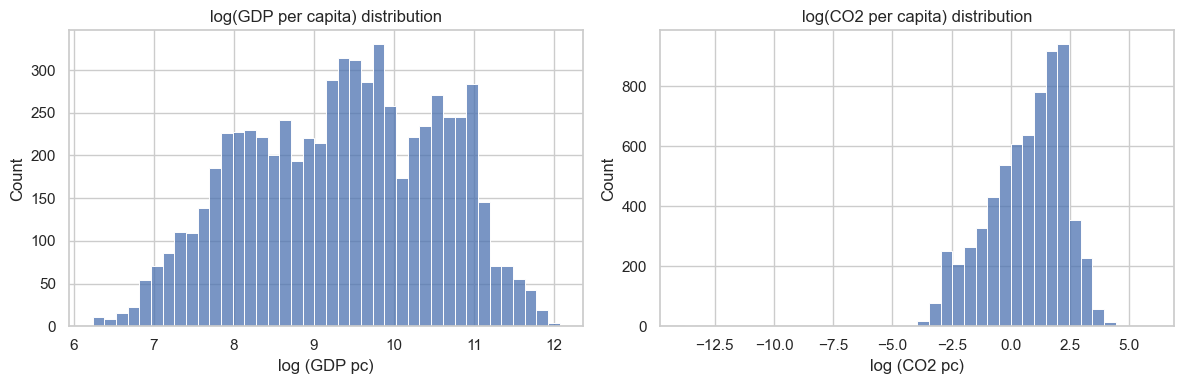

In [19]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_gdp_co2["log (GDP pc)"], bins=40, ax=axes[0])
axes[0].set_title("log(GDP per capita) distribution")

sns.histplot(df_gdp_co2["log (CO2 pc)"], bins=40, ax=axes[1])
axes[1].set_title("log(CO2 per capita) distribution")

plt.tight_layout()
plt.show()


It can be observed that **min(log_co2_pc): -13** is an error because it would mean approximately 0 CO2 emissions per capita, and it also appears only few times (inexistent bar on -13), therefore it must be removed.

In [20]:
df_gdp_co2[df_gdp_co2["CO2 emissions per capita"] < 0.01]

,Country Name,Country Code,Continent,Year,CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %),log (GDP pc),log (CO2 pc)
9815,East Timor,TLS,Asia,1994,0.0,0.0,6.950705e+08,2786.676283,7.122838,7.932605,-13.815511
9816,East Timor,TLS,Asia,1995,0.0,0.0,7.415099e+08,2891.864650,6.681265,7.969657,-13.815511
9817,East Timor,TLS,Asia,1996,0.0,0.0,8.006986e+08,3038.230437,7.982185,8.019031,-13.815511
9818,East Timor,TLS,Asia,1997,0.0,0.0,8.327265e+08,3073.970437,3.999994,8.030725,-13.815511


In [21]:
df_gdp_co2[df_gdp_co2["log (CO2 pc)"] > 5]

,Country Name,Country Code,Continent,Year,CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %),log (GDP pc),log (CO2 pc)
5452,Kuwait,KWT,Asia,1991,492979420.0,364.79083,2.001817e+10,28633.969592,-41.007791,10.262349,5.899324


(Outlier due to Gulf war of 1991, keep it)

In [22]:
print("Observations before CO2 pc > 0.01:", len(df_gdp_co2))

df_gdp_co2 = df_gdp_co2[
    df_gdp_co2["CO2 emissions per capita"] > 0.01
].copy()

print("Observations after CO2 pc > 0.01:", len(df_gdp_co2))


Observations before CO2 pc > 0.01: 6658
Observations after CO2 pc > 0.01: 6654


Now we can apply again the logaritmic transformations

In [23]:
df_gdp_co2["log (GDP pc)"] = np.log(df_gdp_co2["GDP per capita"])
df_gdp_co2["log (CO2 pc)"] = np.log(df_gdp_co2["CO2 emissions per capita"])

df_gdp_co2[["log (GDP pc)", "log (CO2 pc)"]].describe()

,log (GDP pc),log (CO2 pc)
count,6654.000000,6654.000000
mean,9.348655,0.653466
std,1.195782,1.618282
min,6.236023,-3.874476
25%,8.384512,-0.409974
50%,9.420345,0.944304
75%,10.334118,1.916341
max,12.070078,5.899324


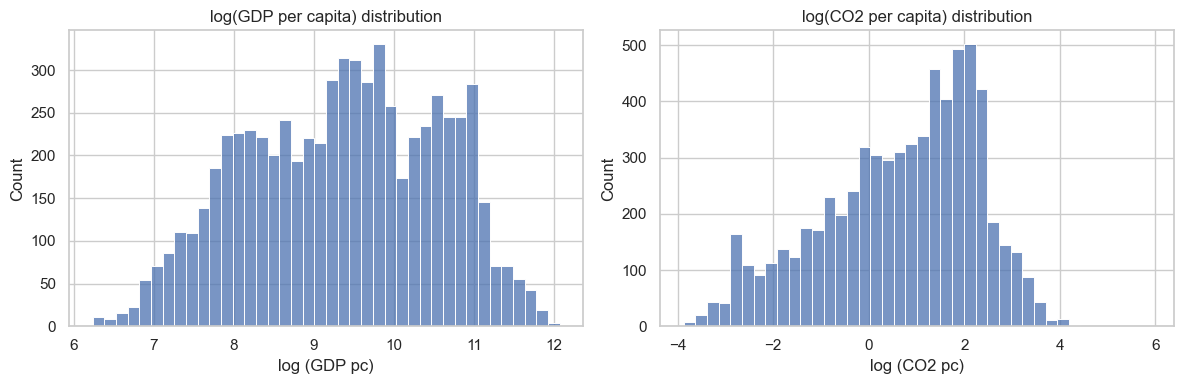

In [24]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_gdp_co2["log (GDP pc)"], bins=40, ax=axes[0])
axes[0].set_title("log(GDP per capita) distribution")

sns.histplot(df_gdp_co2["log (CO2 pc)"], bins=40, ax=axes[1])
axes[1].set_title("log(CO2 per capita) distribution")

plt.tight_layout()
plt.show()


In [25]:
df_gdp_co2[df_gdp_co2["log (CO2 pc)"] == max(df_gdp_co2["log (CO2 pc)"])]

,Country Name,Country Code,Continent,Year,CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %),log (GDP pc),log (CO2 pc)
5452,Kuwait,KWT,Asia,1991,492979420.0,364.79083,2.001817e+10,28633.969592,-41.007791,10.262349,5.899324


*(2 August 1990 – 28 February 1991 --> Gulf war)*

 ---
## 5. Data Saving
Saving `df_gdp_co2` --> `..\data\final\gdp_and_co2_emissions.csv`

In [26]:
df_gdp_co2.to_csv('../data/final/gdp_co2_emissions.csv', index=False)